In [55]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,roc_curve,roc_auc_score
import matplotlib.pyplot as plt  

In [49]:
sonar_df = pd.read_csv(r'..\Cases\Sonar\Sonar.csv')
sonar_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [50]:
X= sonar_df.drop(columns=['Class'])
y= sonar_df['Class']
le= LabelEncoder()
y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
y_train

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

0.8095238095238095

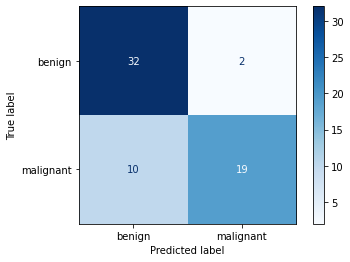

In [ ]:

lr=LogisticRegression( penalty='l2',solver='lbfgs',l1_ratio=0.5)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
# lr.score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'malignant'])
disp.plot(cmap='Blues')
accuracy_score(y_test,y_pred)

In [52]:
y_pred_proba=lr.predict_proba(X_test)
probs=y_pred_proba[:,1]
probs

array([0.76759243, 0.01799221, 0.86327332, 0.40857516, 0.46679865,
       0.16249805, 0.45841858, 0.71297634, 0.25426068, 0.52030314,
       0.20489677, 0.17175385, 0.90092173, 0.12780091, 0.33897886,
       0.08524333, 0.38159409, 0.21942243, 0.53891316, 0.21560776,
       0.42307433, 0.13111367, 0.43183008, 0.4135762 , 0.42183358,
       0.52257177, 0.78298824, 0.50031634, 0.12914143, 0.26847903,
       0.25328112, 0.46563389, 0.03046285, 0.74819215, 0.17011687,
       0.38337425, 0.28617063, 0.25979159, 0.32839289, 0.24631476,
       0.52891826, 0.19841843, 0.63846692, 0.23391173, 0.72792468,
       0.31466789, 0.04145805, 0.87330988, 0.16292722, 0.28322888,
       0.49338276, 0.08275703, 0.0726132 , 0.88046853, 0.41797488,
       0.52086793, 0.67393051, 0.02097508, 0.90616771, 0.53882451,
       0.59049851, 0.36719327, 0.50920137])

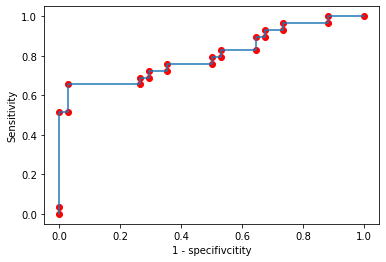

In [53]:
one_m_spec,sens,thrs=roc_curve(y_test,probs)
plt.scatter(one_m_spec,sens,c='red')
plt.plot(one_m_spec,sens)
plt.xlabel("1 - specifivcitity")
plt.ylabel("Sensitivity")
plt.show()

In [54]:
roc_auc_score(y_test,probs)

0.8052738336713996

### Finding the best model

In [62]:
penalities=['l1','l2','elasticnet',None]
ratios=np.linspace(0.001,0.98,20)
scores=[]

for i in penalities:
    for j in ratios:
        lr=LogisticRegression( penalty=i,solver='saga',l1_ratio=j)
        lr.fit(X_train,y_train)
        y_pred_proba=lr.predict_proba(X_test)
        scores.append([i,j,(roc_auc_score(y_test,y_pred_proba[:,1]))])
df_scores=pd.DataFrame(scores,columns=['penalty','l1_ratio','score'])
df_scores.sort_values(by='score',ascending=False,inplace=True)
df_scores.head()

,penalty,l1_ratio,score
65,None,0.258632,0.811359
63,None,0.155579,0.811359
78,None,0.928474,0.811359
77,None,0.876947,0.811359
74,None,0.722368,0.811359
